# Pairs Finding
1. use Hierarchical Clustering
2. use fundemental approach to find industry neutural pairs
3. use information 

In [3]:
from polygon.rest import RESTClient

client = RESTClient("5MKBfYvCSCPekWl824p5l2aSHIIjqh_p")
main_exchanges = ["XNYS", "XNAS", "XASE"] 
tickers = []
for ex in main_exchanges:
	for t in client.list_tickers(
		market="stocks",
		exchange=ex,
		active="true",
		order="asc",
		limit="100",
		sort="ticker",
	):
		tickers.append(t.ticker)

tickers = list(set(tickers))
print(tickers)


['MTN', 'GTLB', 'CBAN', 'PMTpA', 'TENpE', 'GROW', 'RR', 'NNY', 'BMLpL', 'CRBD', 'BTBT', 'SDHIU', 'IKT', 'OTLK', 'HCM', 'LEGT.U', 'LCDS', 'WFCpC', 'BCLI', 'MXE', 'BBAI', 'ULH', 'ZM', 'IPKW', 'ACN', 'DDS', 'NPWR.WS', 'DLTR', 'OCX', 'NAVI', 'TpC', 'TEO', 'FBYDW', 'SPWR', 'MWG', 'NAD', 'RILYL', 'BANX', 'TAP', 'KEYpI', 'TDC', 'ATLN', 'CRCT', 'PDLB', 'FFBC', 'AERTW', 'QTUM', 'VVX', 'WETO', 'PLMK', 'IIF', 'BME', 'CEVA', 'PL.WS', 'FHNpE', 'TEL', 'TLSI', 'LHSW', 'TCBI', 'TK', 'CCNR', 'BWSN', 'TDSpV', 'NVS', 'CG', 'CVEO', 'ONIT', 'TAK', 'AMZZ', 'OMC', 'FGF', 'TCRX', 'AGZD', 'USAU', 'BAYA', 'CTEV', 'SONM', 'BSJR', 'TXG', 'EVLVW', 'BTA', 'MIGI', 'NRP', 'GRMN', 'WALDW', 'ERNZ', 'RVPHW', 'RBRK', 'AGCO', 'PEZ', 'ADUS', 'BSLKW', 'SSBK', 'TCOM', 'SOHON', 'ACU', 'DTSQR', 'YHNAR', 'JOBY.WS', 'TSMU', 'REX', 'TATT', 'GREE', 'ESGD', 'AMRX', 'PAX', 'PNR', 'BRLT', 'TTEC', 'RRBI', 'AOD', 'CANG', 'CDIOW', 'FMSTW', 'EBON', 'IBOT', 'SVC', 'UCTT', 'INZY', 'XRX', 'KEX', 'ARKO', 'BOEU', 'TOST', 'LAUR', 'ZWS', 'CSX',

In [4]:
aggs = []
for a in client.list_aggs(
        "AAPL",
        1,
        "day",
        "2020-04-01",
        "2025-04-01",
        adjusted="true",
        sort="asc",
        limit=50000,
    ):
        aggs.append(a.close)
print(len(aggs))

1235


In [5]:

import pandas as pd
import numpy as np

df = pd.DataFrame(
    columns=tickers
)

for t in tickers:
    aggs = []
    for a in client.list_aggs(
        t,
        1,
        "day",
        "2020-04-01",
        "2025-04-01",
        adjusted="true",
        sort="asc",
        limit=50000,
    ):
        
        aggs.append(a.close)
    if len(aggs) != 1235:
        continue
    df[t] = aggs


In [6]:
df = df.dropna(axis=1).copy()
train, test = df.iloc[:int(1235*0.8)].copy(), df.iloc[int(1235*0.8):].copy()
train_log = train.apply(lambda x: np.log(x))
train_standard = train_log.apply(lambda x: (x - x.mean())/ x.std())
X = train_standard.T 

In [7]:
X

0         1         2         3         4         5         6    \
MTN   -2.377932 -2.542374 -2.469745 -2.311829 -2.085304 -2.150347 -2.482456   
GROW  -2.117300 -2.110653 -2.101867 -2.101867 -2.179944 -2.244098 -2.428933   
NNY   -0.022555 -0.035414 -0.022555  0.015938  0.067066  0.130661  0.181288   
BMLpL -0.708842 -0.844449 -0.762476 -0.636158 -0.631331 -0.487577 -0.506627   
OTLK  -0.933958 -0.925563 -0.888662 -0.830810 -0.786750 -0.696149 -0.578621   
...         ...       ...       ...       ...       ...       ...       ...   
TCBK  -1.642972 -1.848370 -1.876758 -1.937844 -1.655689 -1.773415 -2.111608   
IAF   -1.351333 -1.258619 -1.320274 -1.197574 -1.167276 -1.152182 -1.182406   
APAM  -1.696160 -1.688704 -1.849390 -1.752411 -1.683118 -1.559842 -1.832150   
SYY   -2.655602 -3.173116 -2.958381 -2.895355 -2.738336 -2.986901 -3.380289   
GSpC  -1.097115 -0.998831 -1.047857 -0.967985 -0.916777 -0.754577 -0.745226   

            7         8         9    ...       978       979       980  \
MTN   -2.614768 -2.562233 -2.403715  ... -0.761228 -0.836410 -0.837795   
GROW  -1.852328 -1.633205 -1.908973  ... -0.936614 -0.926698 -0.926698   
NNY    0.117970  0.003121  0.015938  ... -1.028726 -1.056785 -1.042747   
BMLpL -0.624095 -0.677766 -0.684556  ...  0.054363 -0.040800 -0.048087   
OTLK  -0.802490 -0.734937 -0.803906  ... -1.667503 -1.691251 -1.657705   
...         ...       ...       ...  ...       ...       ...       ...   
TCBK  -2.409857 -2.483970 -2.471190  ... -0.611138 -0.597763 -0.594796   
IAF   -1.243302 -1.366922 -1.351333  ... -1.010603 -1.040141 -1.019449   
APAM  -2.112743 -2.096658 -2.167383  ...  0.584167  0.534845  0.585394   
SYY   -3.823313 -3.599667 -3.661469  ...  0.757045  0.685324  0.687353   
GSpC  -0.952596 -1.019446 -0.957723  ...  0.615174  0.601931  0.588672   

            981       982       983       984       985       986       987  
MTN   -0.797463 -0.724936 -0.744829 -0.768622 -0.596535 -0.620555 -0.559889  
GROW  -0.872815 -0.839085 -0.839085 -0.699180 -0.839085 -0.820000 -0.829525  
NNY   -1.000735 -1.014723 -1.042747 -1.056785 -1.127369 -1.070839 -1.099000  
BMLpL -0.055790 -0.146060 -0.018061 -0.068199 -0.022604  0.112829  0.117312  
OTLK  -1.527977 -1.116903 -1.374084 -1.469274 -1.573842 -1.501042 -1.548005  
...         ...       ...       ...       ...       ...       ...       ...  
TCBK  -0.369809 -0.348543 -0.521151 -0.667993 -0.723955 -0.699681 -0.745287  
IAF   -0.944654 -0.915568 -0.930094 -0.988542 -0.901076 -0.872194 -0.843446  
APAM   0.725921  0.750979  0.717543  0.670628  0.687516  0.612326  0.654899  
SYY    0.792171  0.715705  0.653812  0.639540  0.590421  0.233814  0.246667  
GSpC   0.473043  0.459619  0.522119  0.499841  0.459619  0.513214  0.517667  

[3734 rows x 988 columns]

In [8]:
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method='single')
first_merges = Z[:3735//2]
first_merges

array([[6.74000000e+02, 1.00500000e+03, 4.02765623e-01, 2.00000000e+00],
       [3.54400000e+03, 3.73400000e+03, 4.45924793e-01, 3.00000000e+00],
       [2.05800000e+03, 3.30200000e+03, 5.03456375e-01, 2.00000000e+00],
       ...,
       [2.32700000e+03, 5.59700000e+03, 1.02060854e+01, 1.81500000e+03],
       [8.20000000e+01, 5.59800000e+03, 1.02070386e+01, 1.81600000e+03],
       [1.79000000e+02, 4.86800000e+03, 1.02084137e+01, 3.00000000e+00]],
      shape=(1867, 4))

In [9]:
from scipy.cluster.hierarchy import linkage
import heapq

def find_pairs_with_single_linkage(data):
    tickers = data.index.tolist()
    n = data.shape[0]
    Z = linkage(data, method='single')
    first_merges = Z[:n//2]

    pairs = []
    result = []
    for row in first_merges:
        idx1, idx2 = int(row[0]), int(row[1])
        if idx1 < n and idx2 < n:
            ticker1 = tickers[idx1]
            ticker2 = tickers[idx2]
            distance = row[2]
            heapq.heappush(pairs, (distance, ticker1, ticker2))
            if len(pairs) > 50:
                _, t1, t2 = heapq.heappop(pairs)
    
    while pairs:
        distance, t1, t2 = heapq.heappop(pairs)
        result.append((t1, t2, distance))

    result.reverse()
    return result

potential_pairs = find_pairs_with_single_linkage(X)
potential_pairs
    

[('HSY', 'PEP', np.float64(10.062029257020527)),
 ('KO', 'CNP', np.float64(9.9631604219864)),
 ('INN', 'RLJ', np.float64(9.901127776785689)),
 ('EUFN', 'SAN', np.float64(9.889960171238267)),
 ('OMCL', 'CLAR', np.float64(9.809417203581908)),
 ('SHO', 'XHR', np.float64(9.775776585977287)),
 ('LEVI', 'MHK', np.float64(9.760232672055412)),
 ('CBSH', 'GBCI', np.float64(9.71631767956037)),
 ('WHR', 'DLTH', np.float64(9.68271662475992)),
 ('NAVI', 'KLIC', np.float64(9.507312642287618)),
 ('PCAR', 'FICO', np.float64(9.488561702610301)),
 ('ADX', 'TQQQ', np.float64(9.488195208199443)),
 ('CMG', 'MANH', np.float64(9.469026474397735)),
 ('ENTA', 'PINC', np.float64(9.431258931488653)),
 ('CDC', 'AA', np.float64(9.401381995772745)),
 ('EL', 'UGI', np.float64(9.36260519694489)),
 ('QURE', 'BTAI', np.float64(9.21944459352011)),
 ('LII', 'VRT', np.float64(9.190115572400872)),
 ('CCEP', 'GIB', np.float64(9.186367231034001)),
 ('FORD', 'POLA', np.float64(9.185412971867047)),
 ('RIG', 'OII', np.float64(9

## Cointegration (Pairs validation)
We already find some pairs through clustering, now we need to validate these pairs from cointegration

In [10]:
from statsmodels.tsa.stattools import coint

def validate_pairs(df, pairs):
    result = []
    for t1, t2, _ in pairs:
        score, pvalue, _ = coint(df[t1], df[t2])

        result.append({
                'ticker1': t1,
                'ticker2': t2,
                'coint_score': score,
                'p_value': pvalue,
                'is_cointegrated': pvalue < 0.05  
            })
        
    result_df = pd.DataFrame(result)
    result_df = result_df.sort_values('p_value')
    
    return result_df

validate_pairs(train, potential_pairs)


ticker1 ticker2  coint_score   p_value  is_cointegrated
43    PFGC    ENSG    -6.075015  0.000001             True
18    CCEP     GIB    -5.634400  0.000010             True
9     NAVI    KLIC    -5.425828  0.000025             True
45    ABEO    APLT    -5.313528  0.000042             True
41    TITN    RICK    -5.282685  0.000048             True
40    IESC    FTAI    -5.276359  0.000050             True
1       KO     CNP    -5.264606  0.000052             True
8      WHR    DLTH    -5.176052  0.000077             True
6     LEVI     MHK    -5.156664  0.000084             True
16    QURE    BTAI    -5.153477  0.000085             True
39     BMI    FLEX    -5.143613  0.000089             True
27     DAN     MGA    -5.069181  0.000123             True
5      SHO     XHR    -4.898407  0.000252             True
48     JPM     EVR    -4.665582  0.000646             True
13    ENTA    PINC    -4.550121  0.001012             True
44     UBS    MUFG    -4.539072  0.001056             True
42    ULTA     ASR    -4.495128  0.001247             True
29     BMA    SUPV    -4.461967  0.001413             True
15      EL     UGI    -4.323849  0.002350             True
11     ADX    TQQQ    -4.261043  0.002942             True
25     CLF      MT    -4.242825  0.003139             True
31     IPI     ICL    -4.235025  0.003226             True
10    PCAR    FICO    -4.228973  0.003296             True
38     CSL     MOH    -4.063027  0.005827             True
21    BLNK    PLUG    -4.047869  0.006130             True
26     FLL    PTMN    -4.030277  0.006499             True
32     ITT      TT    -4.019410  0.006737             True
47    SPFI     CCB    -3.969899  0.007923             True
23    IPAR    MTRN    -3.904890  0.009766             True
4     OMCL    CLAR    -3.861752  0.011192             True
35    TMHC    GRBK    -3.856756  0.011369             True
7     CBSH    GBCI    -3.846976  0.011722             True
24    ASMB    GLPG    -3.724597  0.017033             True
46    BDTX    ADVM    -3.554467  0.027863             True
3     EUFN     SAN    -3.471301  0.035026             True
30    ESPO    BOTZ    -3.460793  0.036033             True
34       V      MA    -3.373353  0.045398             True
36    MDIV    GYLD    -3.286033  0.056679            False
49     MTG     RDN    -3.261649  0.060209            False
12     CMG    MANH    -3.246771  0.062448            False
20     RIG     OII    -3.149996  0.078696            False
22     SYF     COF    -3.126784  0.083049            False
19    FORD    POLA    -3.106876  0.086930            False
17     LII     VRT    -3.083116  0.091745            False
37    STNE     WIX    -2.842192  0.152629            False
0      HSY     PEP    -2.814773  0.161030            False
14     CDC      AA    -2.748573  0.182597            False
28    ICLN    QCLN    -2.643779  0.220447            False
33    CAMT    DELL    -2.489273  0.283820            False
2      INN     RLJ    -2.279151  0.384001            False

V, MA
SPFI, CCB
lEVI, MHK
MUFG UBS 
SYF	COF	


As we can see some of them are actually same company or same type of assets deliveried by different companies, after excluding such pairs, we still have about 5 pairs can be potential pairs targets, now let's pick one pair first (LEVI, MHK) to build some trading strategy

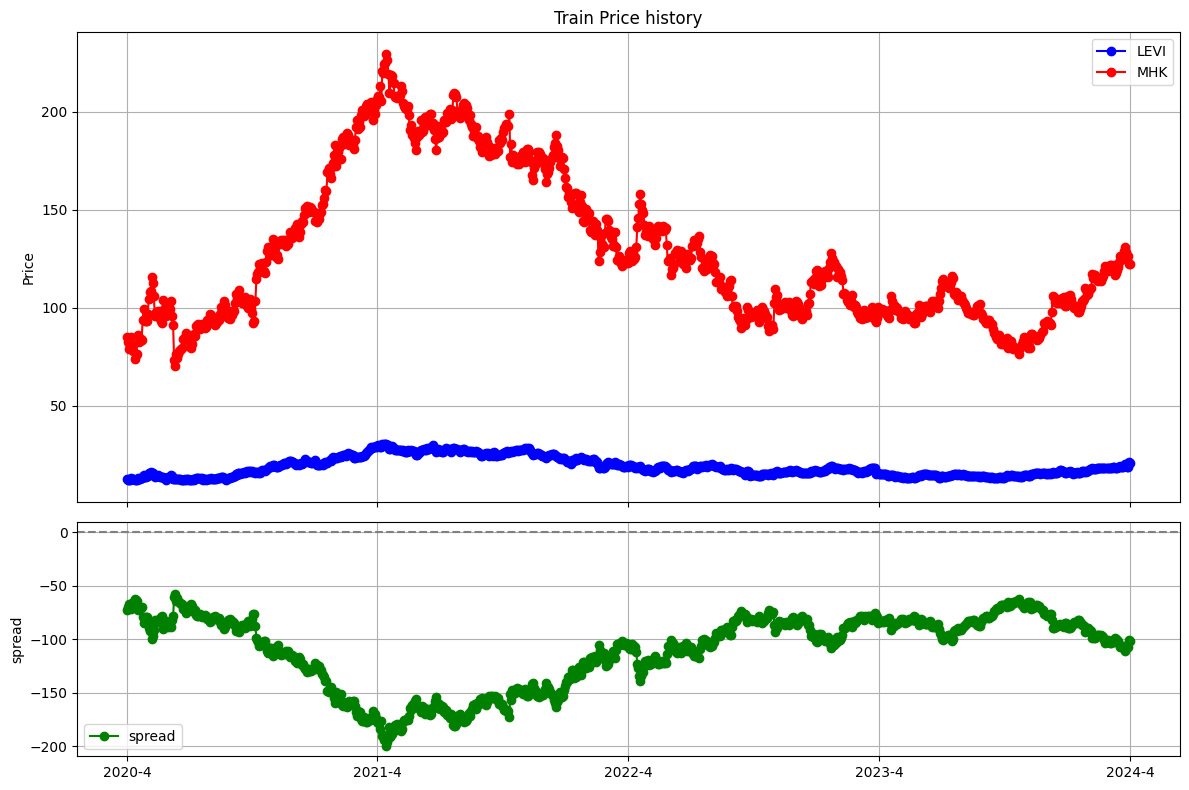

In [11]:
import matplotlib.pyplot as plt

def plot_price(a, b, train):

    stock_a = train[a]
    stock_b = train[b]
    spread = stock_a - stock_b

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    ax1.plot(stock_a, label=stock_a.name, color='blue', marker='o')
    ax1.plot(stock_b, label=stock_b.name, color='red', marker='o')
    ax1.set_title('Train Price history')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    data_length = len(stock_a)
    tick_positions = np.linspace(0, data_length-1, 5, dtype=int)
    tick_labels = ['2020-4', '2021-4', '2022-4', '2023-4', '2024-4']

    ax1.set_xticks(tick_positions)

    ax2.plot(spread, label='spread', color='green', marker='o')
    ax2.set_ylabel('spread')
    ax2.axhline(y=0, color='gray', linestyle='--') 
    ax2.grid(True)
    ax2.legend()

    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels(tick_labels)

    plt.tight_layout()
    plt.show()

plot_price("LEVI", "MHK", train)

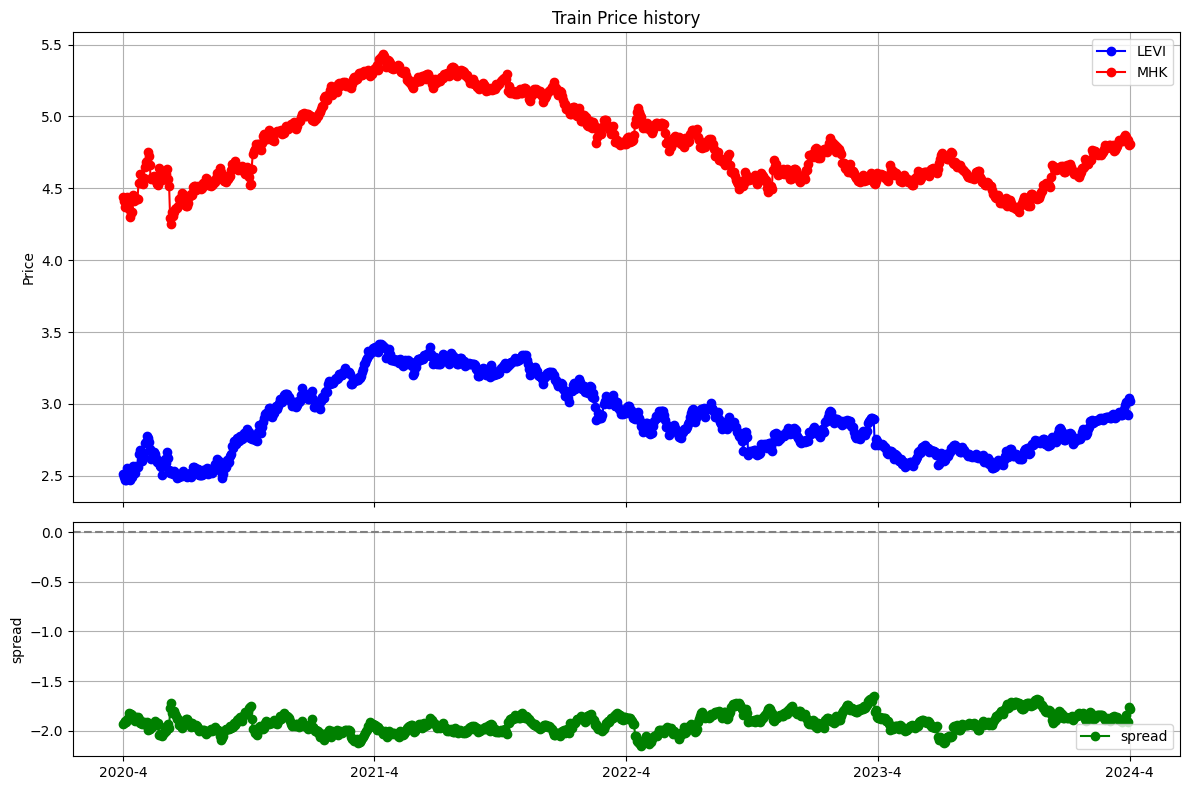

In [12]:
plot_price("LEVI", "MHK", train_log)

As we can see spread is jumping up and down around -2, which indicate good opportunity for pairs trading, let plot another one

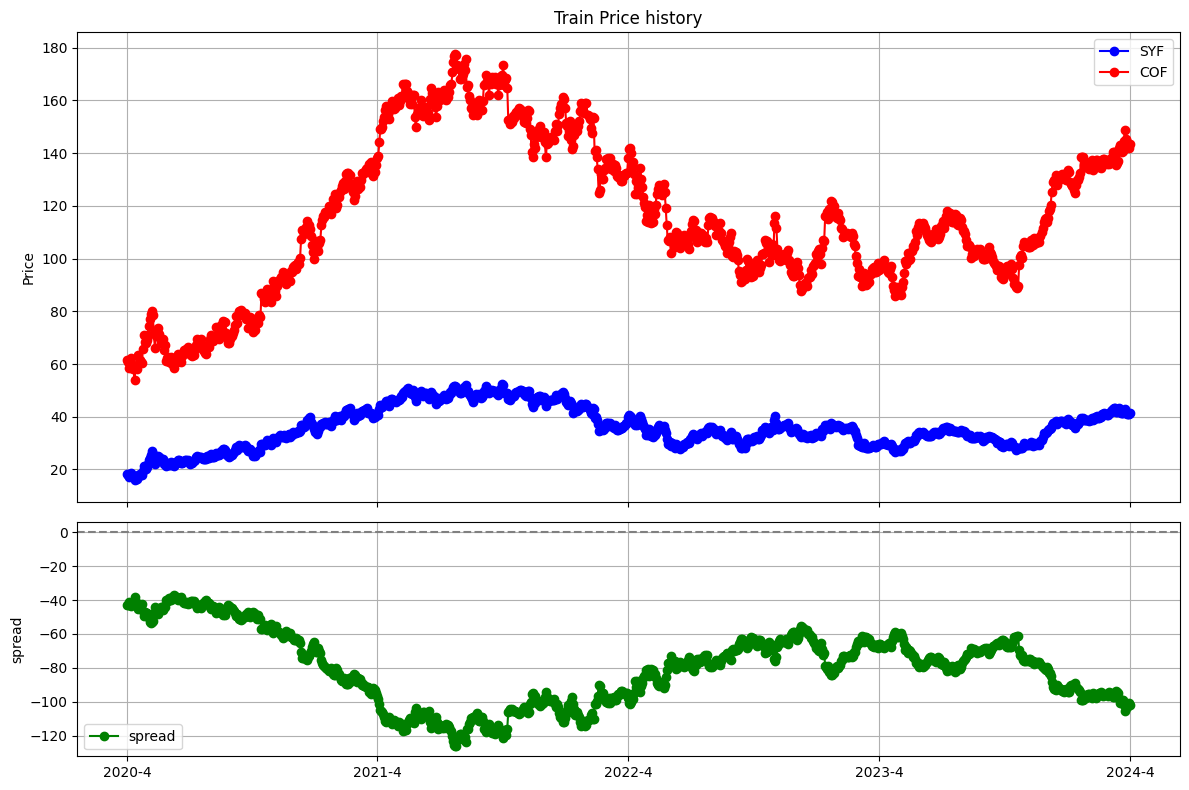

In [13]:
plot_price("SYF", "COF", train)

this above pair has some period with going up and down together period, which indicate we need to do some trend following strategy transition from pairs trading to increase profit

# Trading and Backtesting and forward testing

if the z score is too large, it means spread is too positive, so we long the l

In [14]:
test

MTN    GROW   NNY  BMLpL  OTLK    HCM    ULH     ZM     IPKW     ACN  \
988   230.84  2.8600  8.31  22.65  9.35  16.87  35.01  63.01  40.4800  331.80   
989   232.25  2.8700  8.26  22.68  9.26  17.94  34.90  63.85  40.3600  334.45   
990   231.92  2.8299  8.24  22.55  8.99  17.63  33.22  62.22  40.0250  324.40   
991   229.56  2.8000  8.21  22.36  9.04  18.09  33.81  62.52  39.8200  325.19   
992   226.97  2.8100  8.24  22.23  8.70  17.88  33.10  61.63  39.2300  315.40   
...      ...     ...   ...    ...   ...    ...    ...    ...      ...     ...   
1230  164.10  2.3200  8.29  22.74  1.29  14.22  27.65  77.78  46.2534  311.16   
1231  161.00  2.3700  8.25  22.64  1.40  15.26  27.77  76.78  46.4300  308.53   
1232  161.46  2.2700  8.25  22.45  1.32  15.25  27.36  74.84  45.8100  304.33   
1233  160.02  2.2600  8.26  22.59  1.22  15.04  26.24  73.77  45.6600  312.04   
1234  157.94  2.2600  8.32  22.57  1.22  16.06  26.20  74.02  45.7700  313.58   

      ...    SBH    XEL     ANF      MDU      FEM   TCBK    IAF   APAM    SYY  \
988   ...  10.75  54.08  119.42  13.9335  23.7400  34.44  4.375  46.20  76.74   
989   ...  11.09  54.37  116.12  13.8892  23.8700  34.49  4.400  46.74  77.51   
990   ...  10.92  53.75  114.33  13.6565  23.4600  32.41  4.360  44.64  76.96   
991   ...  11.20  53.49  116.47  13.5457  23.5200  32.45  4.390  44.06  76.57   
992   ...  10.92  53.17  111.83  13.4017  23.1800  32.62  4.190  43.50  75.25   
...   ...    ...    ...     ...      ...      ...    ...    ...    ...    ...   
1230  ...   8.85  68.92   75.72  16.7800  23.1100  40.74  4.100  40.84  72.75   
1231  ...   9.14  69.32   77.53  16.6600  23.2400  40.86  4.070  40.28  74.04   
1232  ...   8.85  69.72   76.57  16.6500  22.9200  39.87  4.060  39.12  74.10   
1233  ...   9.03  70.79   76.37  16.9100  22.8591  39.97  4.030  39.10  75.04   
1234  ...   8.92  70.72   78.77  16.9300  22.9700  39.68  4.050  39.61  75.42   

         GSpC  
988   23.4400  
989   23.4499  
990   23.3400  
991   23.1900  
992   23.2500  
...       ...  
1230  23.5600  
1231  23.3700  
1232  23.1500  
1233  22.7700  
1234  22.7300  

[247 rows x 3734 columns]

In [15]:
def update_cost(current_position, current_cost, new_position, new_price):
    if current_position == 0:
        return new_price

    if new_position == 0:
        return current_cost
        
    if (current_position > 0 and new_position > 0) or (current_position < 0 and new_position < 0):
        total_position = abs(current_position) + abs(new_position)
        return ((abs(current_position) * current_cost) + (abs(new_position) * new_price)) / total_position
    else:
        net_position = current_position + new_position
        
        if net_position == 0:
            return 0
        
        if abs(net_position) < abs(current_position):
            return current_cost
        else:
            return new_price

In [16]:
def hybrid_trading_strategy(test_data, train_data, ticker1, ticker2):
    data = test_data.copy()

    spread_train = np.log(train_data[ticker1]) - np.log(train_data[ticker2])
    window = len(train_data) // 2

    data['spread'] = np.log(data[ticker1]) - np.log(data[ticker2])
    data['zscore'] = np.nan
    data[f'{ticker1}_strong_trend'] = (data[ticker1].rolling(10).mean() > data[ticker1].rolling(30).mean()) & (data[ticker1].rolling(5).mean() > data[ticker1].rolling(10).mean()) 
    data[f'{ticker2}_strong_trend'] = (data[ticker2].rolling(10).mean() > data[ticker2].rolling(30).mean()) & (data[ticker2].rolling(5).mean() > data[ticker2].rolling(10).mean())
        
    data[f'{ticker1}_position'] = 0
    data[f'{ticker2}_position'] = 0 
    data[f'{ticker1}_cost'] = 0
    data[f'{ticker2}_cost'] = 0
    data['strategy'] = 'none'
    data['close_action'] = False

    all_spreads = list(spread_train)

    for i in range(len(data)):
        all_spreads.append(data['spread'].iloc[i])
        
        recent_spreads = all_spreads[-window:]
        update_mean = np.mean(recent_spreads)
        update_std = np.std(recent_spreads)
        data.loc[data.index[i], 'zscore'] = (data['spread'].iloc[i] - update_mean) / update_std
    
    # blotter
    for i in range(1, len(data)):
        data.loc[data.index[i], f'{ticker1}_position'] = data[f'{ticker1}_position'].iloc[i-1]
        data.loc[data.index[i], f'{ticker2}_position'] = data[f'{ticker2}_position'].iloc[i-1]
        data.loc[data.index[i], f'{ticker1}_cost'] = data[f'{ticker1}_cost'].iloc[i-1]
        data.loc[data.index[i], f'{ticker2}_cost'] = data[f'{ticker2}_cost'].iloc[i-1]
        data.loc[data.index[i], 'strategy'] = data['strategy'].iloc[i-1]
        data.loc[data.index[i], 'close_action'] = False  
        
        price1 = data.loc[data.index[i], ticker1]
        price2 = data.loc[data.index[i], ticker2]
        
        ticker1_strong_up = data[f'{ticker1}_strong_trend'].iloc[i]
        ticker2_strong_up = data[f'{ticker2}_strong_trend'].iloc[i]
        
        current_zscore = data['zscore'].iloc[i]
        
        # trend following
        if data.loc[data.index[i], 'strategy'] == "mean_reversion":
            if ticker1_strong_up and not ticker2_strong_up:
                data.loc[data.index[i], 'strategy'] = 'trend_following'
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 100
                data.loc[data.index[i], f'{ticker2}_position'] = 0
                data.loc[data.index[i], f'{ticker1}_cost'] = price1
                data.loc[data.index[i], f'{ticker2}_cost'] = 0
                continue
                
            elif not ticker1_strong_up and ticker2_strong_up:
                data.loc[data.index[i], 'strategy'] = 'trend_following'
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 0
                data.loc[data.index[i], f'{ticker2}_position'] = 100
                data.loc[data.index[i], f'{ticker1}_cost'] = 0
                data.loc[data.index[i], f'{ticker2}_cost'] = price2
                continue
            
            elif abs(current_zscore) < 1:
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 0
                data.loc[data.index[i], f'{ticker2}_position'] = 0
                data.loc[data.index[i], f'{ticker1}_cost'] = 0
                data.loc[data.index[i], f'{ticker2}_cost'] = 0
                data.loc[data.index[i], 'strategy'] = 'none'
                continue
                
        elif data.loc[data.index[i], 'strategy'] == 'trend_following':
            if not (ticker1_strong_up or ticker2_strong_up):
                data.loc[data.index[i], 'close_action'] = True
                data.loc[data.index[i], f'{ticker1}_position'] = 0
                data.loc[data.index[i], f'{ticker2}_position'] = 0
                data.loc[data.index[i], f'{ticker1}_cost'] = 0
                data.loc[data.index[i], f'{ticker2}_cost'] = 0
                data.loc[data.index[i], 'strategy'] = 'none'
                continue

        # mean reversion
        total_value = price1 + price2
        ticker1_portion = int(100 * price1 / total_value) if total_value > 0 else 0
        ticker2_portion = int(100 * price2 / total_value) if total_value > 0 else 0
             
        curr_position_ticker1 = data.loc[data.index[i], f'{ticker1}_position'] 
        curr_position_ticker2 = data.loc[data.index[i], f'{ticker2}_position']
        curr_cost_ticker1 = data.loc[data.index[i], f'{ticker1}_cost']
        curr_cost_ticker2 = data.loc[data.index[i], f'{ticker2}_cost']
        
        if current_zscore > 1.5:
            data.loc[data.index[i], 'strategy'] = 'mean_reversion'

            data.loc[data.index[i], f'{ticker1}_position'] = curr_position_ticker1 - ticker1_portion
            data.loc[data.index[i], f'{ticker2}_position'] = curr_position_ticker2 + ticker2_portion
            data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
            data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)
            
        elif current_zscore < -1.5:
            data.loc[data.index[i], 'strategy'] = 'mean_reversion'
            
            data.loc[data.index[i], f'{ticker1}_position'] = curr_position_ticker1 + ticker1_portion
            data.loc[data.index[i], f'{ticker2}_position'] = curr_position_ticker2 - ticker2_portion
            data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, ticker1_portion, price1)
            data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, -ticker2_portion, price2)
    
    data['daily_pnl'] = 0.0
    
    for i in range(1, len(data)):
        prev_pos1, prev_pos2 = data[f'{ticker1}_position'].iloc[i-1], data[f'{ticker2}_position'].iloc[i-1]
        prev_price1, prev_price2 = data[ticker1].iloc[i-1], data[ticker2].iloc[i-1]
        curr_price1, curr_price2 = data[ticker1].iloc[i], data[ticker2].iloc[i]
        
        unrealized_pnl = (prev_pos1 * (curr_price1 - prev_price1) + prev_pos2 * (curr_price2 - prev_price2))
        
        realized_pnl = 0
        if data['close_action'].iloc[i]:
            cost1, cost2 = data[f'{ticker1}_cost'].iloc[i-1], data[f'{ticker2}_cost'].iloc[i-1]
            realized_pnl = (prev_pos1 * (curr_price1 - cost1) + prev_pos2 * (curr_price2 - cost2))
        
        data.loc[data.index[i], 'daily_pnl'] = unrealized_pnl + realized_pnl
    
    data['cumulative_pnl'] = data['daily_pnl'].cumsum()
    data['portfolio_value'] = 100000 + data['cumulative_pnl']
            
    return data

In [17]:

sub_train_data = train[['LEVI', 'MHK']]
sub_test_data = test[['LEVI', 'MHK']]
b = hybrid_trading_strategy(sub_test_data, sub_train_data, 'LEVI', 'MHK')
b

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '111.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


LEVI     MHK    spread    zscore  LEVI_strong_trend  MHK_strong_trend  \
988   20.55  123.29 -1.791678  0.943031              False             False   
989   20.50  125.15 -1.809088  0.764991              False             False   
990   20.09  119.67 -1.784516  1.010862              False             False   
991   19.86  117.68 -1.779261  1.060928              False             False   
992   19.23  113.17 -1.772420  1.126067              False             False   
...     ...     ...       ...       ...                ...               ...   
1230  16.04  116.86 -1.985891 -0.583977              False             False   
1231  15.98  117.19 -1.992459 -0.627651              False             False   
1232  15.69  113.74 -1.980892 -0.543700              False             False   
1233  15.59  114.18 -1.991146 -0.613945              False             False   
1234  16.38  115.01 -1.948958 -0.315710              False             False   

      LEVI_position  MHK_position  LEVI_cost  MHK_cost strategy  close_action  \
988               0             0        0.0       0.0     none         False   
989               0             0        0.0       0.0     none         False   
990               0             0        0.0       0.0     none         False   
991               0             0        0.0       0.0     none         False   
992               0             0        0.0       0.0     none         False   
...             ...           ...        ...       ...      ...           ...   
1230              0             0        0.0       0.0     none         False   
1231              0             0        0.0       0.0     none         False   
1232              0             0        0.0       0.0     none         False   
1233              0             0        0.0       0.0     none         False   
1234              0             0        0.0       0.0     none         False   

      daily_pnl  cumulative_pnl  portfolio_value  
988         0.0            0.00        100000.00  
989         0.0            0.00        100000.00  
990         0.0            0.00        100000.00  
991         0.0            0.00        100000.00  
992         0.0            0.00        100000.00  
...         ...             ...              ...  
1230        0.0        16972.94        116972.94  
1231        0.0        16972.94        116972.94  
1232        0.0        16972.94        116972.94  
1233        0.0        16972.94        116972.94  
1234        0.0        16972.94        116972.94  

[247 rows x 15 columns]

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def visualize_strategy(results, ticker1, ticker2):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    ax1.plot(results.index, results[ticker1], label=ticker1)
    ax1.plot(results.index, results[ticker2], label=ticker2)
    ax1.set_title('Price Movement')
    ax1.legend()
    ax1.grid(True)

    for i in range(1, len(results)):
        if results['strategy'].iloc[i] == 'trend_following' and results['strategy'].iloc[i-1] != 'trend_following':
            if results[f'{ticker1}_position'].iloc[i] > 0:
                ax1.scatter(results.index[i], results[ticker1].iloc[i], color='purple', marker='^', s=100)
            if results[f'{ticker2}_position'].iloc[i] > 0:
                ax1.scatter(results.index[i], results[ticker2].iloc[i], color='purple', marker='^', s=100)
        
        elif results['strategy'].iloc[i] == 'mean_reversion':
            if results[f'{ticker1}_position'].iloc[i] > 0 and results[f'{ticker1}_position'].iloc[i-1] <= 0:
                ax1.scatter(results.index[i], results[ticker1].iloc[i], color='blue', marker='^', s=80)
            if results[f'{ticker2}_position'].iloc[i] > 0 and results[f'{ticker2}_position'].iloc[i-1] <= 0:
                ax1.scatter(results.index[i], results[ticker2].iloc[i], color='blue', marker='^', s=80)
                
            if results[f'{ticker1}_position'].iloc[i] < 0 and results[f'{ticker1}_position'].iloc[i-1] >= 0:
                ax1.scatter(results.index[i], results[ticker1].iloc[i], color='red', marker='v', s=80)
            if results[f'{ticker2}_position'].iloc[i] < 0 and results[f'{ticker2}_position'].iloc[i-1] >= 0:
                ax1.scatter(results.index[i], results[ticker2].iloc[i], color='red', marker='v', s=80)
        
    ax2.plot(results.index, results['zscore'], color='red')
    ax2.axhline(y=1.5, color='green', linestyle='--')
    ax2.axhline(y=-1.5, color='green', linestyle='--')
    ax2.axhline(y=1, color='black', linestyle='-.')
    ax2.axhline(y=-1, color='black', linestyle='-.')
    ax2.set_title('Z-Score')
    
    for i in range(1, len(results)):
        if results['close_action'].iloc[i] and results['strategy'].iloc[i-1] == "mean_reversion":
            ax2.scatter(results.index[i], results['zscore'].iloc[i], color='blue', marker='*', s=120)
        if results['close_action'].iloc[i] and results['strategy'].iloc[i] == "trend_following":
            ax2.scatter(results.index[i], results['zscore'].iloc[i], color='green', marker='*', s=120)
    
    ax3.plot(results.index, results['cumulative_pnl'], color='blue')
    ax3.set_title('Cumulative Profit & Loss')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

def prepare_data_and_run(train_data, test_data, ticker1, ticker2):
    
    sub_train_data = train_data[[ticker1, ticker2]]
    sub_test_data = test_data[[ticker1, ticker2]]
    results = hybrid_trading_strategy(sub_test_data, sub_train_data, ticker1, ticker2)
    visualize_strategy(results, ticker1, ticker2)
    
    return results

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:108: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:109: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '103.88' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, -ticker2_portion, price2)


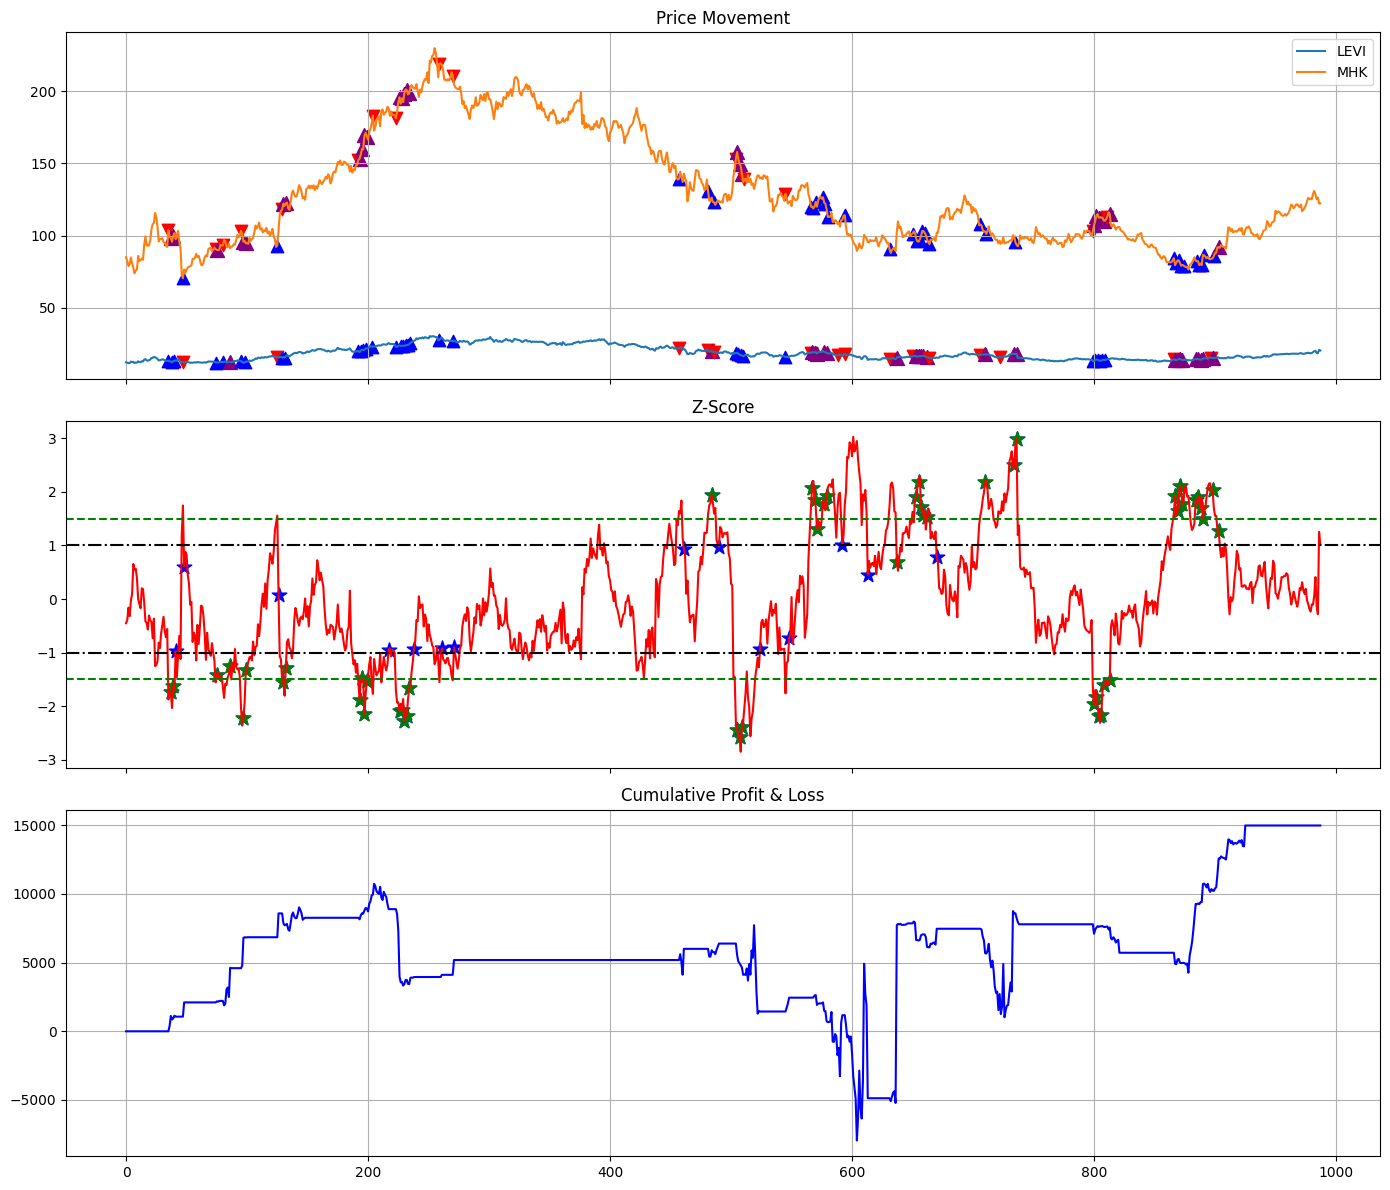

In [19]:
train_trading_data = prepare_data_and_run(train, train, "LEVI", "MHK")

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '111.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


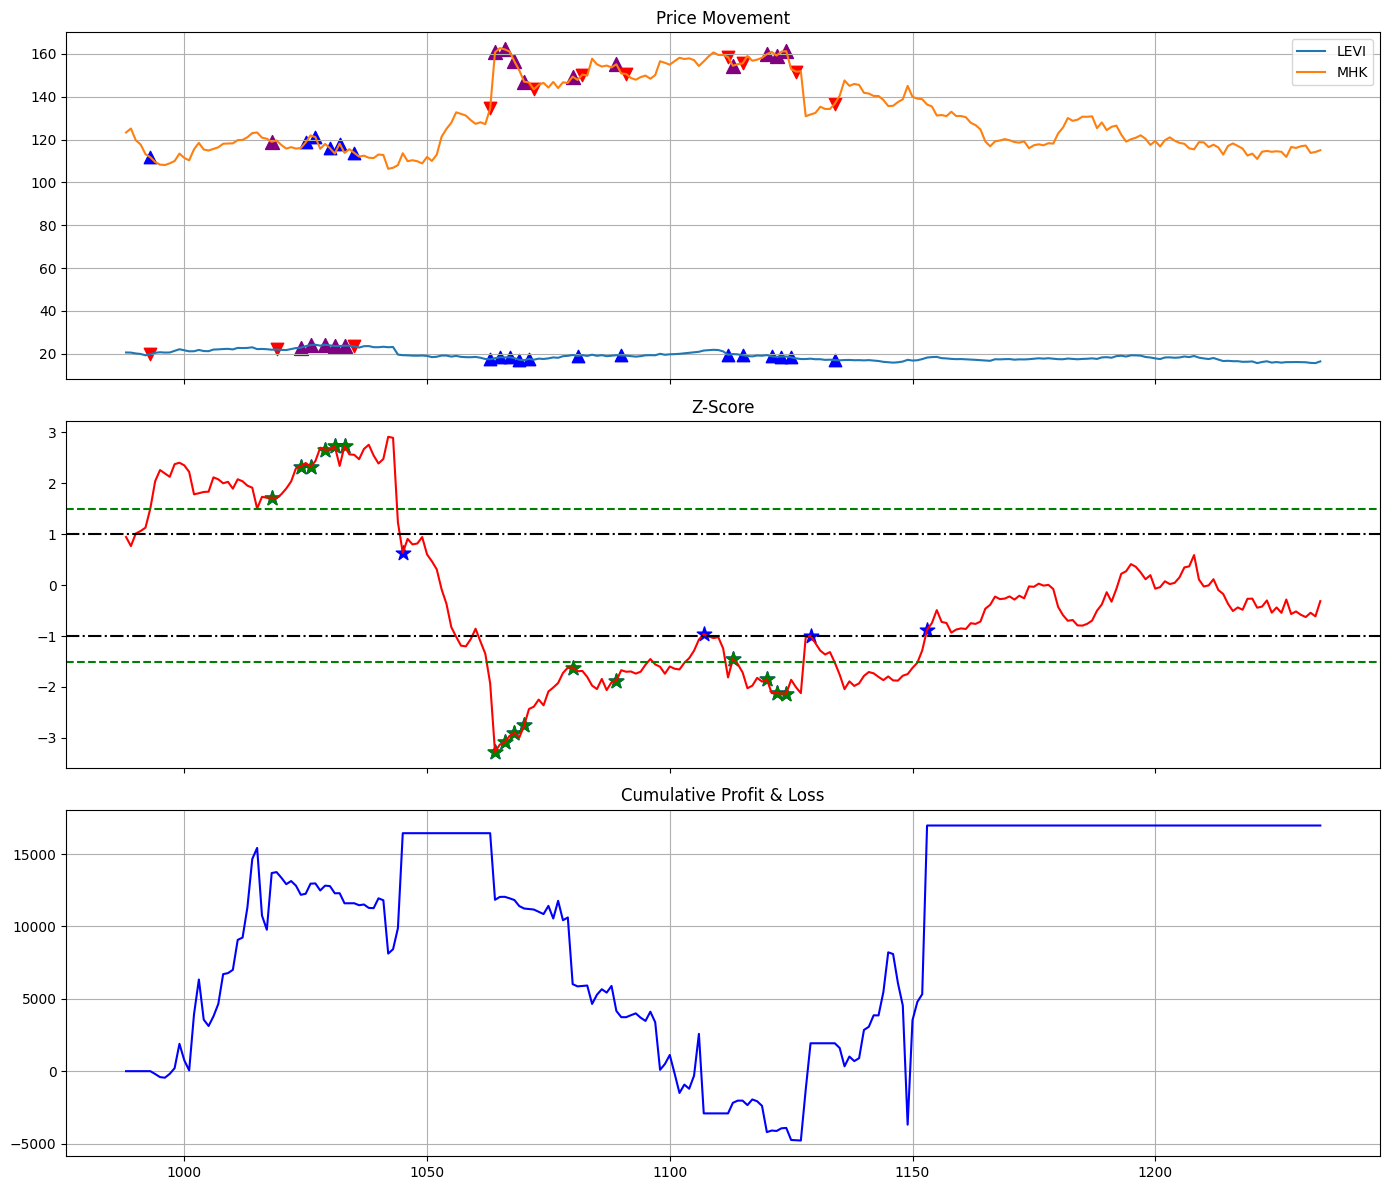

In [47]:
test_trading_data = prepare_data_and_run(train, test, "LEVI", "MHK")

first let's see how it perform on training data

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.39' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '71.17' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


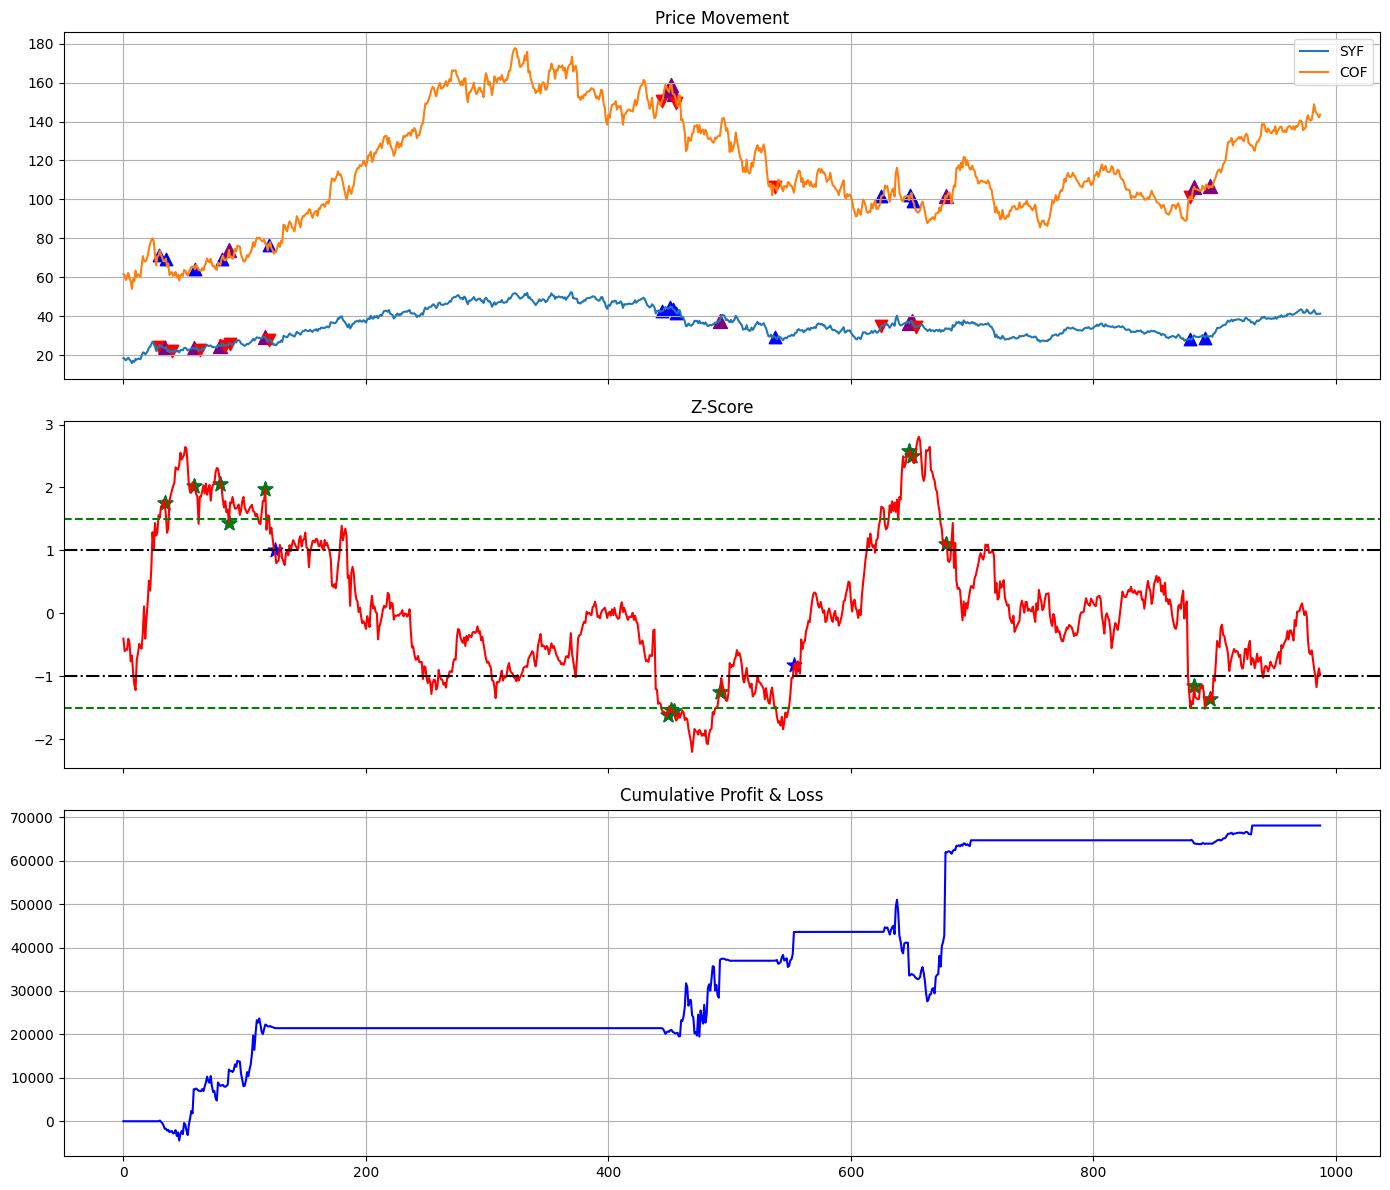

In [21]:
train_trading_data = prepare_data_and_run(train, train, "SYF", "COF")

it perform not bad and meet with out expectation, now let do test data

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.11' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '139.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


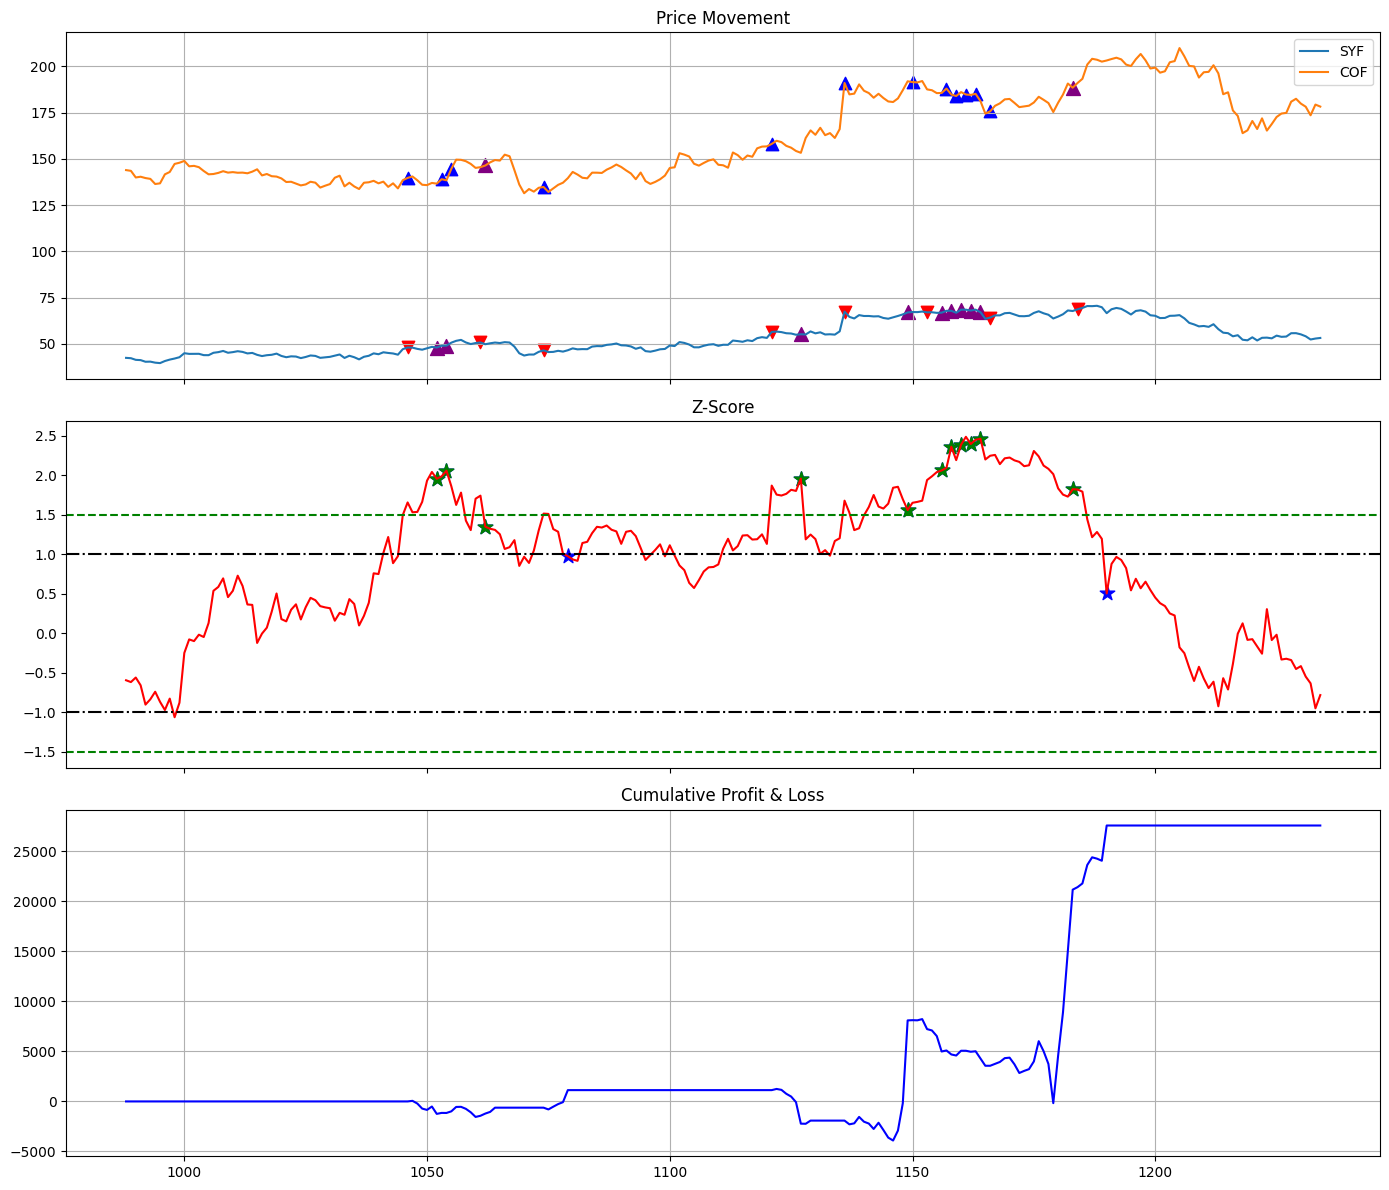

In [22]:
train_trading_data = prepare_data_and_run(train, test, "SYF", "COF")

/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '178.44' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker1}_cost'] = update_cost(curr_position_ticker1, curr_cost_ticker1, -ticker1_portion, price1)
/var/folders/3y/2x5zbm4j57j5nf781lnm28b00000gn/T/ipykernel_79584/3985361826.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '273.98' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], f'{ticker2}_cost'] = update_cost(curr_position_ticker2, curr_cost_ticker2, ticker2_portion, price2)


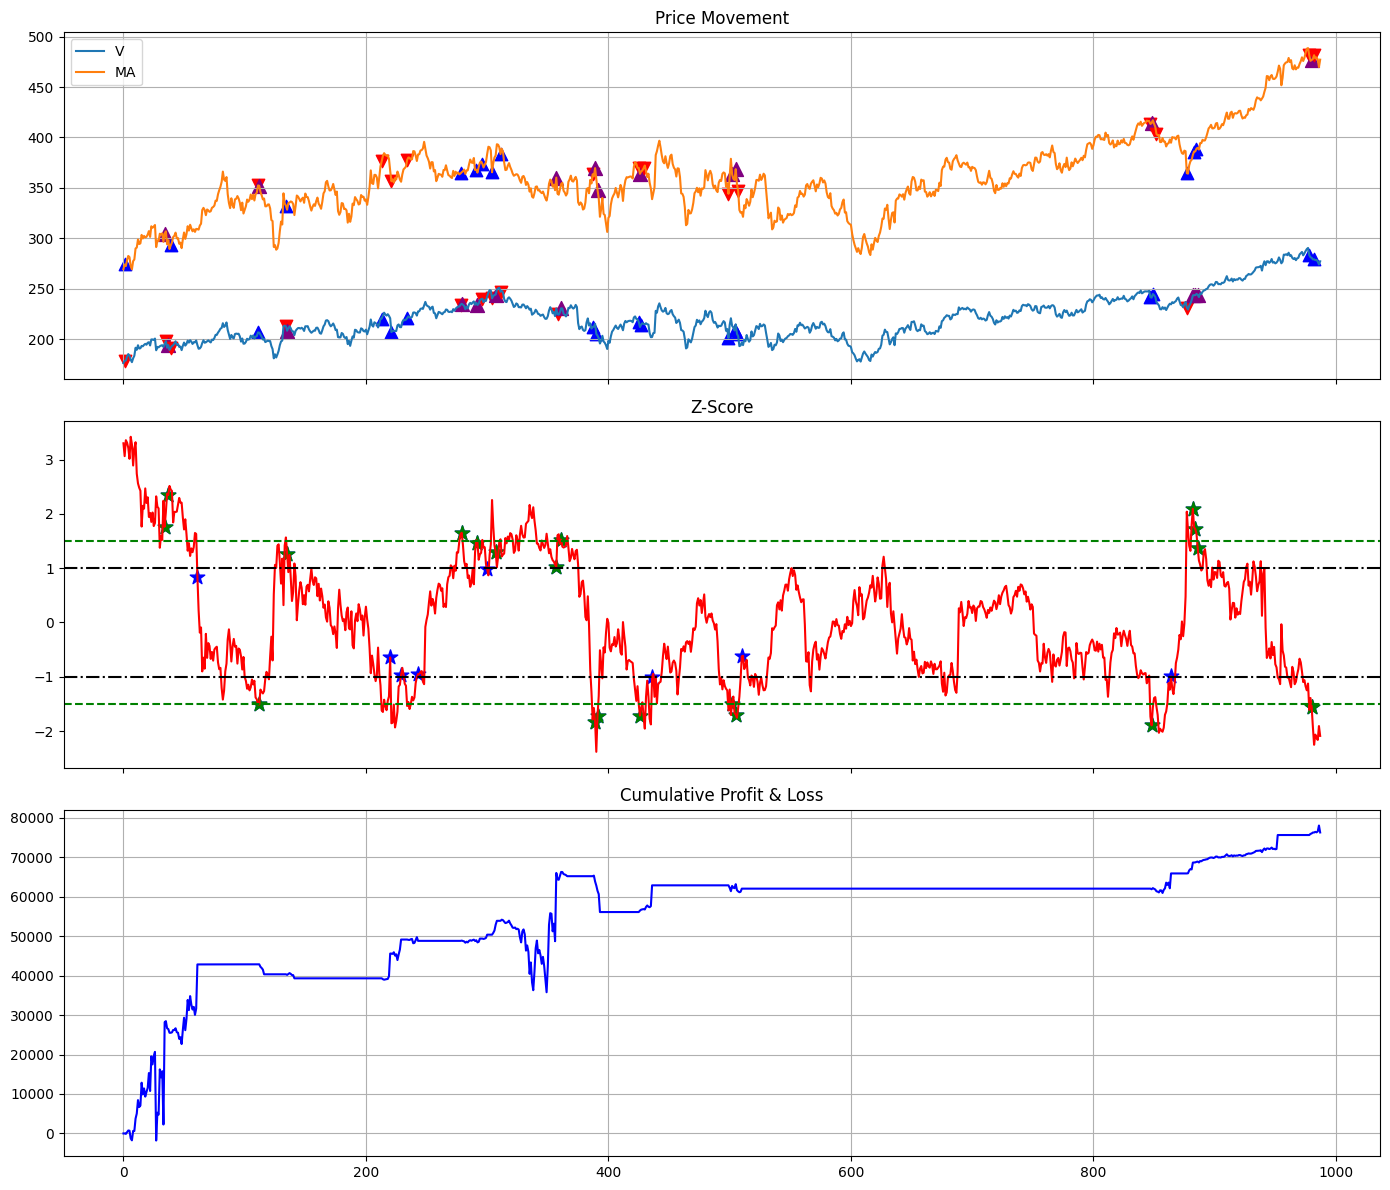

In [23]:
train_trading_data = prepare_data_and_run(train, train, "V", "MA")

In [24]:
train_trading_data

V      MA    spread    zscore  V_strong_trend  MA_strong_trend  \
0    176.15  269.26 -0.424342  3.300179           False            False   
1    178.44  273.98 -0.428803  3.063360           False            False   
2    178.78  272.44 -0.421262  3.357088           False            False   
3    182.72  278.47 -0.421355  3.310920           False            False   
4    185.09  282.44 -0.422624  3.216664           False            False   
..      ...     ...       ...       ...             ...              ...   
983  278.28  478.40 -0.541819 -2.065170           False            False   
984  278.44  479.43 -0.543395 -2.123758           False            False   
985  276.96  477.42 -0.544524 -2.163001           False            False   
986  274.00  469.77 -0.539115 -1.907656           False            False   
987  277.14  477.15 -0.543308 -2.089258           False            False   

     V_position  MA_position      V_cost     MA_cost        strategy  \
0             0            0    0.000000    0.000000            none   
1           -39           60  178.440000  273.980000  mean_reversion   
2           -78          120  178.610000  273.210000  mean_reversion   
3          -117          180  179.980000  274.963333  mean_reversion   
4          -156          240  181.257500  276.832500  mean_reversion   
..          ...          ...         ...         ...             ...   
983          72         -126  278.680000  479.985000  mean_reversion   
984         108         -189  278.600000  479.800000  mean_reversion   
985         144         -252  278.190000  479.205000  mean_reversion   
986         180         -315  277.352000  477.318000  mean_reversion   
987         216         -378  277.316667  477.290000  mean_reversion   

     close_action  daily_pnl  cumulative_pnl  portfolio_value  
0           False       0.00            0.00        100000.00  
1           False       0.00            0.00        100000.00  
2           False    -105.66         -105.66         99894.34  
3           False     416.28          310.62        100310.62  
4           False     437.31          747.93        100747.93  
..            ...        ...             ...              ...  
983         False     170.91        76433.11        176433.11  
984         False    -118.26        76314.85        176314.85  
985         False     220.05        76534.90        176534.90  
986         False    1501.56        78036.46        178036.46  
987         False   -1759.50        76276.96        176276.96  

[988 rows x 15 columns]

# Blotter and Lotter

In [25]:
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start='2024-04-01', end='2025-04-01')
trading_days = pd.date_range(start="2024-04-01", end="2025-04-01", freq="B")

all_trading_days = trading_days[~trading_days.isin(holidays)]

blotter = test_trading_data[['LEVI', 'MHK', 'strategy', 'zscore', 'close_action', 'daily_pnl']]
blotter.index = all_trading_days[:len(blotter)]
blotter.head()

LEVI     MHK strategy    zscore  close_action  daily_pnl
2024-04-01  20.55  123.29     none  0.943031         False        0.0
2024-04-02  20.50  125.15     none  0.764991         False        0.0
2024-04-03  20.09  119.67     none  1.010862         False        0.0
2024-04-04  19.86  117.68     none  1.060928         False        0.0
2024-04-05  19.23  113.17     none  1.126067         False        0.0

In [26]:
lodger = test_trading_data[['LEVI', 'MHK', 'LEVI_position', 'MHK_position', 'cumulative_pnl', 'portfolio_value']]
lodger.index = all_trading_days[:len(lodger)]
lodger

LEVI     MHK  LEVI_position  MHK_position  cumulative_pnl  \
2024-04-01  20.55  123.29              0             0            0.00   
2024-04-02  20.50  125.15              0             0            0.00   
2024-04-03  20.09  119.67              0             0            0.00   
2024-04-04  19.86  117.68              0             0            0.00   
2024-04-05  19.23  113.17              0             0            0.00   
...           ...     ...            ...           ...             ...   
2025-03-20  16.04  116.86              0             0        16972.94   
2025-03-21  15.98  117.19              0             0        16972.94   
2025-03-24  15.69  113.74              0             0        16972.94   
2025-03-25  15.59  114.18              0             0        16972.94   
2025-03-26  16.38  115.01              0             0        16972.94   

            portfolio_value  
2024-04-01        100000.00  
2024-04-02        100000.00  
2024-04-03        100000.00  
2024-04-04        100000.00  
2024-04-05        100000.00  
...                     ...  
2025-03-20        116972.94  
2025-03-21        116972.94  
2025-03-24        116972.94  
2025-03-25        116972.94  
2025-03-26        116972.94  

[247 rows x 6 columns]

let's test if we have trend following for another pair

# Statistics

In [51]:
import numpy as np
import pandas as pd
from scipy import stats

def calculate_performance_metrics(df, benchmark_data, risk_free_rate=0.01):
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    if isinstance(benchmark_data, pd.DataFrame):
        if len(benchmark_data.columns) == 1:
            benchmark_data = benchmark_data.iloc[:, 0]
    
    benchmark_data = pd.Series(benchmark_data)
    if not isinstance(benchmark_data.index, pd.DatetimeIndex):
        benchmark_data.index = pd.to_datetime(benchmark_data.index)
    benchmark_data = benchmark_data.sort_index()
    
    common_dates = df.index.intersection(benchmark_data.index)
    if len(common_dates) == 0:
        raise ValueError("no common date")
    
    df = df.loc[common_dates]
    benchmark_data = benchmark_data.loc[common_dates]
    
    daily_returns = df['portfolio_value'].pct_change().dropna()
    benchmark_returns = benchmark_data.pct_change().dropna()
    
    common_dates = daily_returns.index.intersection(benchmark_returns.index)
    daily_returns = daily_returns.loc[common_dates]
    benchmark_returns = benchmark_returns.loc[common_dates]
    
    trading_days = len(daily_returns)
    years = trading_days / 252  
    
    volatility = daily_returns.std() * np.sqrt(252)
    
    cumulative_return = (1 + daily_returns).prod() - 1
    geo_mean_return = (1 + cumulative_return) ** (1 / years) - 1
    
    sharpe_ratio = (geo_mean_return - risk_free_rate) / volatility
    
    beta, alpha, r_value, p_value, std_err = stats.linregress(benchmark_returns, daily_returns)
    
    alpha_annualized = (1 + alpha) ** 252 - 1
    
    strategy_changes = df['strategy'].fillna('').astype(str)
    trade_changes = (strategy_changes != strategy_changes.shift()).astype(int)
    total_trades = trade_changes.sum() / 2  
    
    avg_return_per_trade = cumulative_return / total_trades if total_trades > 0 else 0
    
    avg_trades_per_year = total_trades / years
    
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak) - 1
    max_drawdown = drawdown.min()
    
    results = {
        'Alpha (Annualized)': alpha_annualized,
        'Beta': beta,
        'Volatility (Annualized)': volatility,
        'Geometric Mean Return (Annualized)': geo_mean_return,
        'Sharpe Ratio': sharpe_ratio,
        'Average Return per Trade': avg_return_per_trade,
        'Average Trades per Year': avg_trades_per_year,
        'Maximum Drawdown (MDD)': max_drawdown,
        'Total Return': cumulative_return,
        'Total Trades': total_trades,
        'R-squared': r_value ** 2
    }
    
    return results

def plot_performance_comparison(df, benchmark_data, name='Portfolio', benchmark_name='S&P 500'):
    import matplotlib.pyplot as plt
    
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    
    if isinstance(benchmark_data, pd.DataFrame):
        if len(benchmark_data.columns) == 1:
            benchmark_data = benchmark_data.iloc[:, 0]
        else:
            raise ValueError("benchmark_data应该是Series或只有一列的DataFrame")
    
    benchmark_data = pd.Series(benchmark_data)
    if not isinstance(benchmark_data.index, pd.DatetimeIndex):
        benchmark_data.index = pd.to_datetime(benchmark_data.index)
    
    common_dates = df.index.intersection(benchmark_data.index)
    df = df.loc[common_dates]
    benchmark_data = benchmark_data.loc[common_dates]
    
    portfolio_norm = df['portfolio_value'] / df['portfolio_value'].iloc[0]
    benchmark_norm = benchmark_data / benchmark_data.iloc[0]
    
    portfolio_returns = df['portfolio_value'].pct_change().dropna()
    benchmark_returns = benchmark_data.pct_change().dropna()
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
    
    axes[0].plot(portfolio_norm.index, portfolio_norm, label=name, linewidth=2)
    axes[0].plot(benchmark_norm.index, benchmark_norm, label=benchmark_name, linewidth=2, alpha=0.7)
    axes[0].set_title(f'{name} vs {benchmark_name} (Normalized)', fontsize=14)
    axes[0].set_ylabel('Normalized Value', fontsize=12)
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(portfolio_returns.index, portfolio_returns, label=f'{name} Daily Returns', alpha=0.7)
    axes[1].plot(benchmark_returns.index, benchmark_returns, label=f'{benchmark_name} Daily Returns', alpha=0.5)
    axes[1].set_title('Daily Returns Comparison', fontsize=14)
    axes[1].set_ylabel('Daily Return', fontsize=12)
    axes[1].legend()
    axes[1].grid(True)
    
    portfolio_cum_returns = (1 + portfolio_returns).cumprod()
    portfolio_peak = portfolio_cum_returns.expanding(min_periods=1).max()
    portfolio_drawdown = (portfolio_cum_returns / portfolio_peak) - 1
    
    benchmark_cum_returns = (1 + benchmark_returns).cumprod()
    benchmark_peak = benchmark_cum_returns.expanding(min_periods=1).max()
    benchmark_drawdown = (benchmark_cum_returns / benchmark_peak) - 1
    
    axes[2].fill_between(portfolio_drawdown.index, portfolio_drawdown, 0, color='red', alpha=0.3, label=f'{name} Drawdown')
    axes[2].fill_between(benchmark_drawdown.index, benchmark_drawdown, 0, color='blue', alpha=0.3, label=f'{benchmark_name} Drawdown')
    axes[2].set_title('Drawdown Comparison', fontsize=14)
    axes[2].set_ylabel('Drawdown', fontsize=12)
    axes[2].set_xlabel('Date', fontsize=12)
    axes[2].legend()
    axes[2].grid(True)
    
    plt.tight_layout()
    return fig

[*********************100%***********************]  1 of 1 completed


Alpha (Annualized): 0.20907225882214697
Beta: -0.02207309393907233
Volatility (Annualized): 0.23217431372634117
Geometric Mean Return (Annualized): 0.1749806185161853
Sharpe Ratio: 0.7105894526758216
Average Return per Trade: 0.00789439069767443
Average Trades per Year: 22.114285714285714
Maximum Drawdown (MDD): -0.1823565779336478
Total Return: 0.16972940000000025
Total Trades: 21.5
R-squared: 0.00017579763253437912


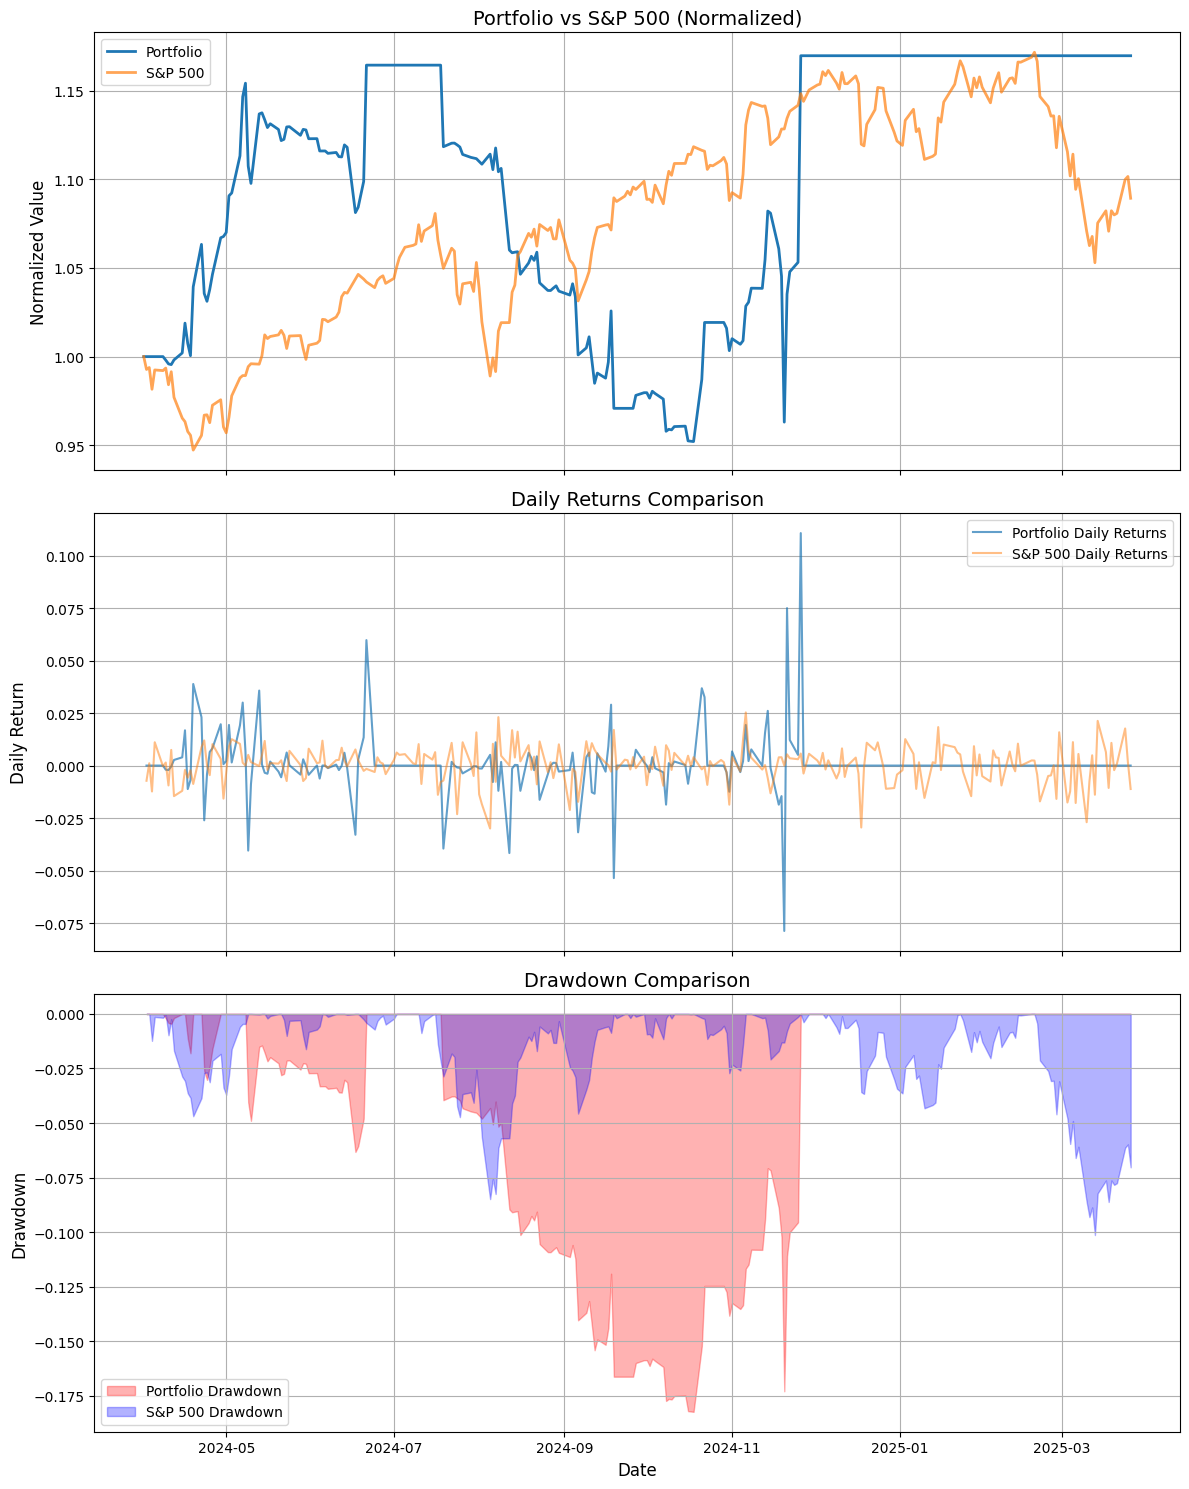

In [52]:
import yfinance as yf

sp500_data = yf.download('^GSPC', start='2024-04-01', end='2025-04-01')['Close']

metrics = calculate_performance_metrics(test_trading_data, sp500_data)

for key, value in metrics.items():
    print(f"{key}: {value}")

fig = plot_performance_comparison(test_trading_data, sp500_data)
plt.show()